# Entropy-based test for generalized Student -t Distributions


Parameters:
* dimension: dim (m)
* Degrees-of-freedom: dof (nu)
* sample size: npts (N)


All distributions are isotropic with
* mean vector = (0,0,...,0)
* variance-covariance matrix = I_m


Investigate the distribution of the test statistic

$$ 
\widehat{T}_{N,k} =  \exp \left\{\widehat{H}_{N, k, \textit{q}}\right \} \big{/} 
\sqrt{\det {\frac{\nu -2}{\nu}}\widehat{C}_N } - c_0(\nu, m)
$$
converge to zero in probability as $N \to \infty$ for any fixed $k \geq 1$, where $\widehat{H}_{N, k, \textit{q}}$


$$
\widehat{H}_{N,k,\textit{q}} = \frac{1}{1-\textit{q}}\log 
\left[\frac{1}{N}\sum_{i=1}^{N}\left(\zeta_{N,i,k}\right)^{1-\textit{q}} \right]= 
\frac{1}{1-\textit{q}}\log \left[\widehat{I}_{N,i, {k}} \right]
$$

and $\widehat{C}_N$ is defined as

$$
  \widehat{C}_N = \left( \frac{1}{N-1} \sum_{r=1}^{N} X_r^{(i)}X_r^{(j)}    
 \right)_{1 \leq {i}, {j} \leq {N}} = \frac{1}{N-1} \sum_{r=1}^{N}X_r X_r^{\prime},
$$


and also $c_0(\nu, m)$  is defined 

$$
 c_0(\nu, m) = \frac{B^{\frac{1}{1-\textit{q}}} \left(\frac{\textit{q}(m + \nu)}{2} - \frac{m}{2}, 
\frac{m}{2}\right)(\pi \nu)^{\frac{m}{2}}}{B^{\frac{\textit{q}}{1-\textit{q}}}(\frac{\nu}{2}, 
\frac{m}{2})\Gamma \left(\frac{m}{2} \right)},
$$

for various values of the parameters
    $k$ - nearest neighbour index
    $\nu$ - degrees of freedom

N = 1000, 2000, ..., 100000
m = 1,2,3
k = 1
$\nu$ = 3, 4, 5,


In [7]:
# import packages
import numpy as np
import scipy as sc
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from sklearn.neighbors import KDTree
# Golden ratio (for nice plotting)
GR = (1+np.sqrt(5))/2

In [4]:
# https://arcca.github.io/
# https://portal.supercomputing.wales/
# https://portal.supercomputing.wales/index.php/index/accessing-the-system/ 

### 1a. Create point sets
    - Generalised T -  distribution
    - Multivariate Laplace-distribution
Distributions have zero mean and identity variance-covariance matrix.
Points are scaled by the true variance, not the sample variance.

#### Isotropic Student t-distribution
If $X = \frac{Z}{\sqrt{G}}$ where $Z\sim N(0,I_m)$ 
and $G\sim\text{Gamma}(\nu/2,2/\nu)$
then $X\sim\text{ST}(m,\nu)$.

In [8]:
def create_points_T(npts, dim=2, nu=10, std=True):
    '''
    If X = Z/\sqrt{G} where Z ~ N(0,I_m) and G ~ Gamma(nu/2,2/nu) then X ~ IST(m,nu)
    '''
    
    # set mean vector and covariance matrix
    mvec = [0]*dim
    cmtx = np.identity(dim)
    
    # create normal vectors
    zpts = np.random.multivariate_normal(mvec, cmtx, npts)
    
    # create gamma values
    gvals = np.tile(np.random.gamma(nu/2.0, nu/2.0, npts),(dim,1)).T
    
    # create points
    points = mvec + zpts/np.sqrt(gvals)
    
    # standardise if required
    if std:
        sf = nu/(nu-2) 
        points = points/np.sqrt(sf)
    
    return(points)



In [9]:
def create_points_L(npts, dim=2, std=False):

    '''
    If Z = d = sqrt(V_0).X where X ~ N_m(0,C) and V_0 is exponential
   '''
    # set mean vector and covariance matrix
    mvec = [0]*dim
    cmtx = np.identity(dim)
        
    # create isotropic normal vectors    
    Xpts = np.random.multivariate_normal(mvec, cmtx, npts)
    
    # create exponential values
    V_vals = np.random.exponential(scale = 1, size=npts)
    
    # Taking squaroot of V_0 
    Vpts = np.sqrt(V_vals )
    
    # create points
    points = np.multiply(Xpts, Vpts[:, np.newaxis]) if dim > 1 else np.multiply(Xpts, Vpts)
    
    return points
        

In [10]:
def create_points_GG(npts, dim=2, expo=2, std=True):
    '''
    If X = UR where U is uniformly distributed on the unit sphere in R^m 
    and R = V^{1/s} where V ~ Gamma(m/s,2) then X ~ GG(m,s). From (Solaro 2004).
    '''
    # set mean vector and covariance matrix
    mvec = [0]*dim
    cmtx = np.identity(dim)
    
    # create isotropic normal vectors
    zpts = st.multivariate_normal.rvs(mvec, cmtx, npts)
    
    # project onto sphere
    upts = np.array([z/np.linalg.norm(z) for z in zpts])
    
    # create gamma values
    gvals = st.gamma.rvs(dim/expo, scale=2, size=npts)**(1/expo)
    
    # create points
    points = np.multiply(upts, gvals[:, np.newaxis]) if dim > 1 else np.reshape(np.multiply(upts, gvals),(npts,1))
    
    # standardise if required
    if std:
        sf = (2**(2/expo))*sc.special.gamma((dim+2)/expo)/(dim*sc.special.gamma(dim/expo))
        points = points/np.sqrt(sf)
    
    return points

In [11]:
npts = 10000
ptsGG = create_points_GG(npts, dim=2, expo=2, std=True)
print(np.mean(ptsGG))

0.0014255075831056687


In [12]:
# check mean and variance
npts = 10000

ptsT = create_points_T(npts, dim=2, nu=23, std=True)

print(np.mean(ptsT), np.var(ptsT))

ptsL = create_points_L(npts, dim=3, std=True)
print(np.mean(ptsL), np.var(ptsL))


0.00015404530765027196 0.007467885106652981
0.004396621854445375 1.008477361329102


In [373]:
def showpts(point_sets, ncols=2):
    num_sets = len(point_sets)
    nrows = int(np.ceil(num_sets/ncols))
    fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(6*GR,6))
    if nrows > 1:
        axes = [a for b in axes for a in b]
    for idx, ax in enumerate(axes):
        if idx < num_sets:
            tit, pts = point_sets[idx]
            ax.scatter(pts[:,0],pts[:,1], marker='.', color='b', s=1)
            ax.set_title(tit)
        ax.axis(adjustable='box')
        ax.set_aspect(aspect=1)
    fig.tight_layout()
    plt.savefig('scatter.png')
    plt.show()

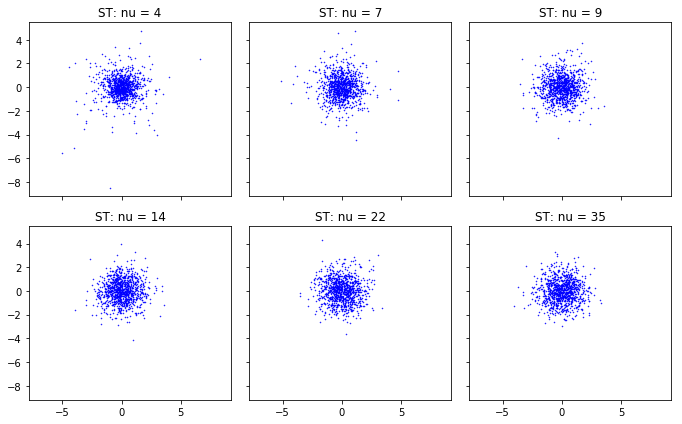

In [374]:
# test ST point sets
m = 2
npts = 1000
nuvals = [4, 7, 9, 14, 22, 35]
point_sets = []
for nu in nuvals:
    pts = create_points_T(npts, dim=m, nu=nu, std=True)
    tit = 'ST: nu = {:d}'.format(nu)
    point_sets.append((tit, pts))

showpts(point_sets, ncols=3)

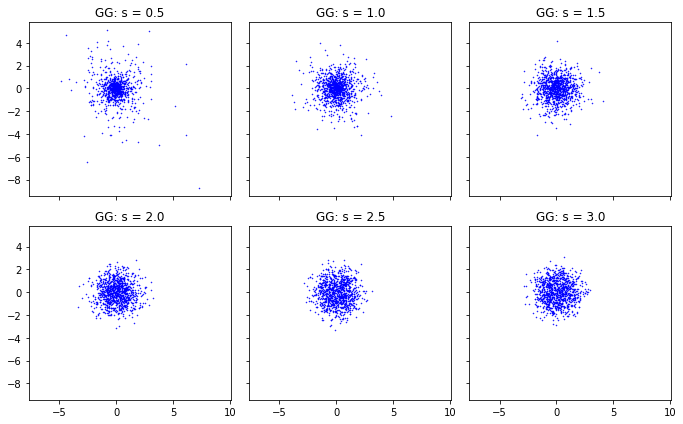

In [375]:
# test GG point sets
m = 2
npts = 1000
svals = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
point_sets = []
for s in svals:
    pts = create_points_GG(npts, dim=m, expo=s, std=True)
    tit = 'GG: s = {:.1f}'.format(s)
    point_sets.append((tit, pts))

showpts(point_sets, ncols=3)

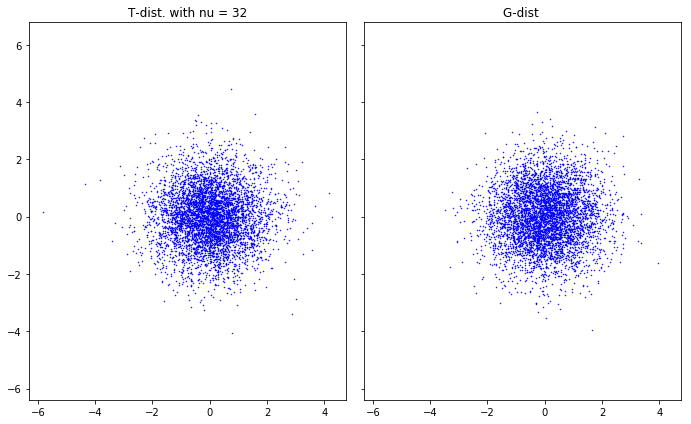

In [377]:
npts = 5000
ptsT  = create_points_T(npts, dim=2, nu=32, std=True)
ptsGG  =  create_points_GG(npts, dim=2, expo=2, std=True)
showpts([('T-dist. with nu = 32',ptsT), ('G-dist ', ptsGG)])

## 2. Plot empirical CDF, PDF and LogPDF of T point sets

Smoothing the curves produces misleading plots. We just have to use lots of data!

In [378]:
def plot_empirical(hist_data, cum=True, log=False, smooth=False, width=5, xlim=[-4,4], ylim=[-9,1], swlen=1):
    
    # init figure
    GR = (1+np.sqrt(5))/2
    fig, ax = plt.subplots(figsize=(width*GR,width))

    # plot histogram data
    for key,val in hist_data.items():
        tit = 'dof = {:.2f}'.format(key)
        x,y = val
        if cum:
            y = y.cumsum()
            y /= y[-1]
        if log:
            np.seterr(divide = 'ignore') 
            y = np.log(y)
            np.seterr(divide = 'warn')
        if smooth:
            y = np.convolve(y, np.ones(swlen)/swlen, mode='same')
        plt.plot(x,y,label=tit)

    # plot std normal (dotted)
    xvals = np.linspace(-4, +4, 100)
    y = np.exp(-0.5*xvals**2)/np.sqrt(2*np.pi)
    if cum:
        y = y.cumsum()
        y /= y[-1]
    if log:
        y = np.log(y)
    ax.plot(xvals, y, 'k--', linewidth=1.5, label='N(0,1)')

    # set title and tidy up
    ax.grid(True)
    ax.legend(loc='upper right')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) # tweak    
    ptype = 'cdf' 
    if not cum: 
        ptype = 'pdf'
    if log: 
        ptype = 'log-' + ptype
#     ax.set_title('Empirical {} of GG samples for different values of $s$'.format(ptype))
    plt.savefig('empirical-{}.png'.format(ptype))
    plt.show()

In [396]:
# create histogram data
m = 1
nuvals = [4, 7, 9, 14, 22, 35, 43]
nbins = 256
npts = 1000000
hist_data = {}
for sidx, nu in enumerate(nuvals):
    print('\r' + 'x'*(sidx+1) + '-'*(len(nuvals)-sidx-1), end='')
    pts = create_points_T(npts, dim=m, nu=nu)
    hist_values, bin_edges = np.histogram(pts, bins=nbins, density=True)
    bin_centres = 0.5*(bin_edges[:-1]+bin_edges[1:])
    hist_data[nu] = (bin_centres,hist_values)

xxxxxxx

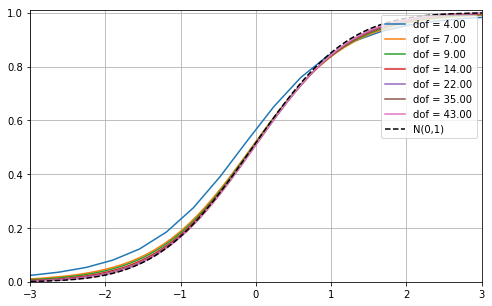

In [397]:
# ECDFs
plot_empirical(hist_data, xlim=[-3,3], ylim=[0,1.01])


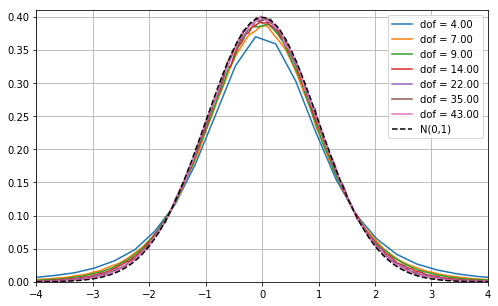

In [398]:
# EPDFs
plot_empirical(hist_data, cum=False, xlim=[-4,4], ylim=[0,0.41])

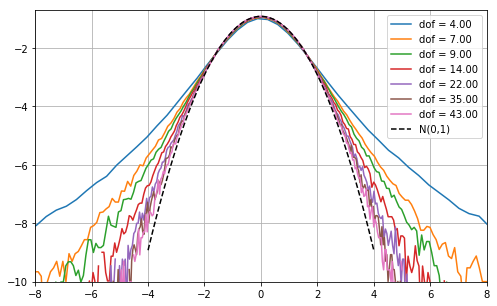

In [399]:
# LOG-EPDFs
plot_empirical(hist_data, cum=False, log=True, xlim=[-8,8], ylim=[-10, -0.7])

## Estimate the entropy of Renyi

$$\widehat{H}_{N,k,q} = \frac{1}{1-q}\log \left[\frac{1}{N}\sum_{i=1}^{N}%
\left(\zeta_{N,i,k}\right)^{1-q} \right] $$ where
$$\zeta_{N,i,k} = (N-1)C_{k} {V_m} (\rho_{k,N-1}^{(i)})^m,$$  
$$C_k = \left[\frac{\Gamma(k)}{\Gamma(k+1-q)}\right]^{\frac{1}{1-q}},$$ 
$$V_m = \pi^{\frac{m}{2}}/\Gamma(\frac{m}{2} + 1)$$ and 
$$\bar{\rho} = \left\{\prod_{i=1}^{N}\rho_{1,N-1}^{(i)}\right\}^{\frac{1}{N}}.$$
$$ q = 1- \frac{2}{dof-m}$$


## Degrees of freedom

$$dof = \frac{2}{1-q}-m>2$$

In [13]:
def degrees_of_freedom(dim, q):
    return 2/(1-q)-dim

In [14]:
dim = 2
q = 5/6
dof = degrees_of_freedom(dim, q)
dof

10.000000000000004

In [15]:
 def compute_near_neighbour_distances(points, nnmax):
    
    # search tree
    tree = KDTree(points)
    
    # extract distances
    dist, ind = tree.query(points, k=nnmax+1)
    
    # exclude zeroth neighbour (the point itself)
    return dist[:,1]

In [17]:
# test nn for T distribitio. In here, we only consider k = 1
pts = create_points_T(10000, dim=2, nu=5, std=True)
nnd = compute_near_neighbour_distances(pts,nnmax=1)
#gmeans = sc.stats.mstats.gmean(nnd)
#print(gmeans)

$$\widehat{H}_{N,k,q} = \frac{1}{1-q}\log \left[\frac{1}{N}\sum_{i=1}^{N}%
\left(\zeta_{N,i,k}\right)^{1-q} \right] $$
$$\zeta_{N,i,k} = (N-1)C_{k} {V_m} (\rho_{k,N-1}^{(i)})^m,$$ 

In [18]:
def compute_R_entropy_estimate(points, q):

    # extract dimensions 
    num_pts, m = points.shape
    nnmax = k=1

    # compute volume of unit ball 
    vub = (np.pi**(m/2))/(sc.special.gamma(m/2 + 1))
    
    # compute digamma function value
    # psi_k = -np.euler_gamma + harmonic_number(k-1)
    
    # compute  the value of C_k 
    C_k = (sc.special.gamma(k) / sc.special.gamma(k + 1 - q)) ** (1 / (1-q))
    
    # near neighbour distances
    nnd = compute_near_neighbour_distances(points, nnmax)
    
    # geometric means
    #gmeans = sc.stats.mstats.gmean(nnd)
    
    # compute  the value of zeta
    zeta = (num_pts-1) *(C_k ) * (vub) * (nnd) ** m
    
    # compute and return estimate
    est = (1 / (1-q) )* np.log(np.mean(np.sum(zeta**(1-q) )))

    return(est)

In [19]:
npts =10000
points = create_points_T(npts, dim=2, nu=3, std=True)
compute_R_entropy_estimate(points, q)

57.13614661054502

$$
\sqrt{\det {\frac{\nu -2}{\nu}}\widehat{C}_N }
$$

$$
  \widehat{C}_N  = \frac{1}{N-1} \sum_{r=1}^{N}X_r X_r^{\prime},
$$

In [22]:
def compute_C_N(npts, dim):
    npts = N=10000
    points =  create_points_T(npts, dim, nu=6, std=True)
    X_r = points[0]
    X_m = points[0].transpose()
    product = np.outer(X_r , X_m)
    for i in range(1,N):
        X_r = points[i]
        X_m = points[i].transpose()
        product = product + np.outer(X_r , X_m)
    
    Rowsum = product
    C_N = (Rowsum)/(N - 1) 
    C_N2 = ((dof-2)/dof)*C_N
    C_N3 = np.linalg.det(C_N2)
    const = np.sqrt(C_N3)
    return const  

In [23]:
compute_C_N(npts, dim)

0.08770736962761701

$$
 c_0(\nu, m) = \frac{B^{\frac{1}{1-\textit{q}}} \left(\frac{\textit{q}(m + \nu)}{2} - \frac{m}{2}, 
\frac{m}{2}\right)(\pi \nu)^{\frac{m}{2}}}{B^{\frac{\textit{q}}{1-\textit{q}}}(\frac{\nu}{2}, 
\frac{m}{2})\Gamma \left(\frac{m}{2} \right)},
$$

In [30]:
def compute_constant(m,q):
    dim = m = points.shape[1]
    num = (sc.special.beta(q*(m + dof)/2 - m/2, m/2))**(1/(1-q))*(np.pi * dof) ** (m/2)
    deno = ((sc.special.beta(dof/2, m/2)) ** (q/(1-q)))*(sc.special.gamma(m/2))
    c_0 =  num / deno
    return c_0

In [31]:
compute_constant(m=2,q=5/6)


23.968449810713174

### Test Statistic

$$ 
\widehat{T}_{N,k} =  \exp \left\{\widehat{H}_{N, k, \textit{q}}\right \} \big{/} 
\sqrt{\det {\frac{\nu -2}{\nu}}\widehat{C}_N } - c_0(\nu, m)
$$
where $\widehat{C}_N$ is defined as

$$
  \widehat{C}_N  = \frac{1}{N-1} \sum_{r=1}^{N}X_r X_r^{\prime},
$$
and 
$$
 c_0(\nu, m) = \frac{B^{\frac{1}{1-\textit{q}}} \left(\frac{\textit{q}(m + \nu)}{2} - \frac{m}{2}, 
\frac{m}{2}\right)(\pi \nu)^{\frac{m}{2}}}{B^{\frac{\textit{q}}{1-\textit{q}}}(\frac{\nu}{2}, 
\frac{m}{2})\Gamma \left(\frac{m}{2} \right)}.
$$




In [33]:
def compute_test_statistic(points,q):
    
    # extract parameters 
    dim = m = points.shape[1]
    # estimate entropy
    entropy_estimate =  compute_R_entropy_estimate(pts, q)
    
    # compute C_N(hat)
    const = compute_C_N(npts, dim)

    # compute quotient
    quot = np.e**entropy_estimate /(const) 
                     
    # compute constant c_0(v,m)
    c_0 =  compute_constant(dim,q)
                     
    # return test statistic
    return quot - c_0

# @@@@@@@@@@@@@@@@@

# @@@@@@@@@@@@@@@@@

# 4. Consistency

For fixed $(m,\nu)$ and $(N,k)$ we estimate the distribution of $T_{N,k}(m,\nu)$ by generating $MST(m,\nu)$ samples of size $N$ then recording the empirical values of $T_{N,k}(m,\nu)$, and repeating this $M$ times. This yields a sample realisation $\{T_1,T_2,\ldots,T_M\}$ from the distribution of $T_{N,k}(m,\nu)$, from which we can estimate its mean $\mu_T$ and variance $\sigma^2_T$ by

$$
\bar{T} = \frac{1}{M}\sum_{j=1}^M T_i
\quad\text{and}\quad
S^2_T = \frac{1}{M-1}\sum_{j=1}^M (T_i - \hat{T})^2
$$

If the Central Limit Theorem holds (not obvious) the sample mean estimator satisfies
$$
\bar{T} \sim N\left(\mu_T,\frac{\sigma^2_T}{M}\right)\quad\text{approx.}
$$

When looking at the behaviour of $T_{N,k}(m,\nu)$  as $N$ increases we plot the sample mean $\bar{T}$ with error bars showing the standard deviation of the sample mean estimator, $S_T/\sqrt{M}$, which is also known as the *standard error*.



In [ ]:
# Set parameter values
# These are used further down!

# dimension
mvals = np.array([1,2,3])

# neighbours
kvals = np.array([1,2,3])

# exponent
nuvals = np.array([5/6, 6/7, 7/8, 8/9, 9/10])

# sample size
Nmin = 10
Nmax = 500
Ninc = 10
Nvals = np.arange(start=Nmin, stop=Nmax+1, step=Ninc)

# repetitions
nreps = 10

In [ ]:
# Create data 
def create_data(Nvals, mvals, nuvals, kvals, nreps):
    
    # init memory
    datacube = np.zeros(shape=(nreps,len(Nvals),len(mvals), len(nuvals), len(nuvals), len(kvals)))

    # info
    import datetime
    print(datetime.datetime.now())
    # main loop 
    for rep in range(nreps):
        
        # progress bar
        print('\r' + 'x'*(rep+1) + '-'*(nreps-rep-1), end='')

        # iterate over m-values
        for midx, m in enumerate(mvals):

            # iterate over sR-values (reality)
            for sRidx, sR in enumerate(nuvals):

                # create sample
                pts =create_points_T(Nmax, dim=m, nu=sR

                # iterate over subsamples
                for Nidx, N in enumerate(Nvals):

                    # iterate over sH-values (hypothesised)
                    for sHidx, sH in enumerate(nuvals):

                        datacube[rep,Nidx,midx,sRidx,sHidx:] = compute_statistics(pts[:N], expo=sH, nnmax=len(kvals))

    print('Ended at:   {}'.format(datetime.datetime.now()))
    return(datacube)

# check
if input("Generate data: are you sure? (y/n)") == "y":
    data  = create_data(Nvals, mvals, svals, kvals, nreps)



In [ ]:
# save data
np.save('datacube1.npy', data)
data.shape

In [ ]:
# load data
data2 = np.load('datacube1.npy')
data2.shape

In [ ]:
## Plots for fixed $k$

In [ ]:
# plot separately with errorbars (k fixed)
kval = 1
kidx = np.where(kvals==kval)[0][0]
width = 12
fig, axes = plt.subplots(nrows=len(svals), ncols=len(mvals), sharex=True, sharey=True, figsize=(width,1.5*width))
for sidx, sval in enumerate(svals):
    for midx, mval in enumerate(mvals):
        ax = axes[sidx,midx]
        ax.axhline(y=0, linewidth=1, color='k')
        desc = st.describe(data[:,:,midx,sidx,sidx,kidx])
        ax.errorbar(x=Nvals, y=desc.mean, yerr=np.sqrt(desc.variance)/np.sqrt(nreps), capsize=5, errorevery=5)
        ax.set_title('m={}, s={}, k={}'.format(mval,sval,kval));
        if sidx == len(svals)-1: ax.set_xlabel('$N$', fontsize=12)
        if midx == 0: ax.set_ylabel('$T_{N,k}(m,s)$', fontsize=16)
        ax.set_xlim([Nmin,Nmax])        
        ax.set_ylim([-0.05,0.05]) # tweak        
        ax.grid(1);    
fig.tight_layout()
plt.savefig('consistency-k={}.png'.format(kval))
plt.show();    

# 5. Goodness of fit

## The behaviour of $T_{N,k}(m,\nu)$ on data from $GST(m,\nu)$.
We generate data from the $GST(m,\nu)$ distribution and examine the behaviour of $T_{N,k}(m,\nu_0)$ for different values of $\nu_0$ and $\nu_1$. According to our maximum entropy principle, its value should be strictly negative when $\nu_0\neq \nu_1$. 

We observe that this value becomes increasingly negative as $|\nu_1-\nu_0|$ increases.

In [658]:
# read saved data if necessary
data = np.load('datacube1.npy')

In [ ]:
# set parameters
m = 2
k = 1
midx = np.where(mvals==m)[0][0]
kidx = np.where(kvals==k)[0][0]

In [ ]:
# plot for different s0 and s1
# s0: used to compute the statistic (hypothesised value)
# s1: used to generate the data (reality value)

width = 12
fig, axes = plt.subplots(nrows=len(svals), ncols=len(svals), 
#     sharex=True, sharey=True, 
    figsize=(width,1.25*width)
)
for s0idx, s0 in enumerate(svals):
    for s1idx, s1 in enumerate(svals):
        ax = axes[s0idx,s1idx]
        ax.axhline(y=0, linewidth=1, color='k')
        ax.grid(1);    
        desc = st.describe(data[:,:,midx,s1idx,s0idx,kidx])
        ax.errorbar(x=Nvals, y=desc.mean, yerr=np.sqrt(desc.variance)/np.sqrt(nreps), capsize=5, errorevery=5, label='$s_1={}$'.format(s1))
        ax.set_title(r'$s_0={}, s_1={}$'.format(s0,s1))
        if s0idx == len(svals)-1: 
            ax.set_xlabel('$N$', fontsize=12)
        if s1idx == 0: 
            ax.set_ylabel(r'$T_{N,k}(m,s_0)$', fontsize=16)
#         ax.set_xlim([Nmin,Nmax])        
#         ax.set_ylim([-0.05,0.05]) # tweak        
fig.tight_layout()
plt.savefig('convergence-GG.png')
plt.show()    



### Asymptotic  behaviour of $T_{N,k}(m,s)$ on data from $ST(m,\nu)$ with $\nu=3,4,5,6$.

In [651]:
# Generate data from ST(m,nu) and compute T(m,s)

# dimension
mvals = np.array([1,2,3])

# neighbours
kvals = np.array([1,2,3])
k = 1
# exponent
#svals = np.array([0.5, 1.0, 1.5, 2.0])

# dofs
nuvals = np.array([6,8,12,23])

# sample size
Nmin = 10
Nmax = 500
Ninc = 10
Nvals = np.arange(start=Nmin, stop=Nmax+1, step=Ninc)

# experiment
nreps = 10

In [655]:
dataST = np.zeros(shape=(nreps,len(Nvals),len(mvals),  len(nuvals)))

# info
import datetime
print(datetime.datetime.now())

# main loop
for rep in range(nreps):
    print('\r' + 'x'*(rep+1) + '-'*(nreps-rep-1), end='')

    # iterate over dimension
    for midx, m in enumerate(mvals):

        # iterate over dof values
        for nuidx, nu in enumerate(nuvals):

            # create sample
            ptsT = create_points_T(Nmax, dim=m, dof=nu)
        
            # iterate over subsamples
            for Nidx, N in enumerate(Nvals):
                dataST[rep,Nidx,midx,nuidx,:] = compute_test_statistic(ptsT[:N],dof=nu)

2020-10-19 11:19:44.269566
x---------

IndexError: too many indices for array

IndexError: too many indices for array

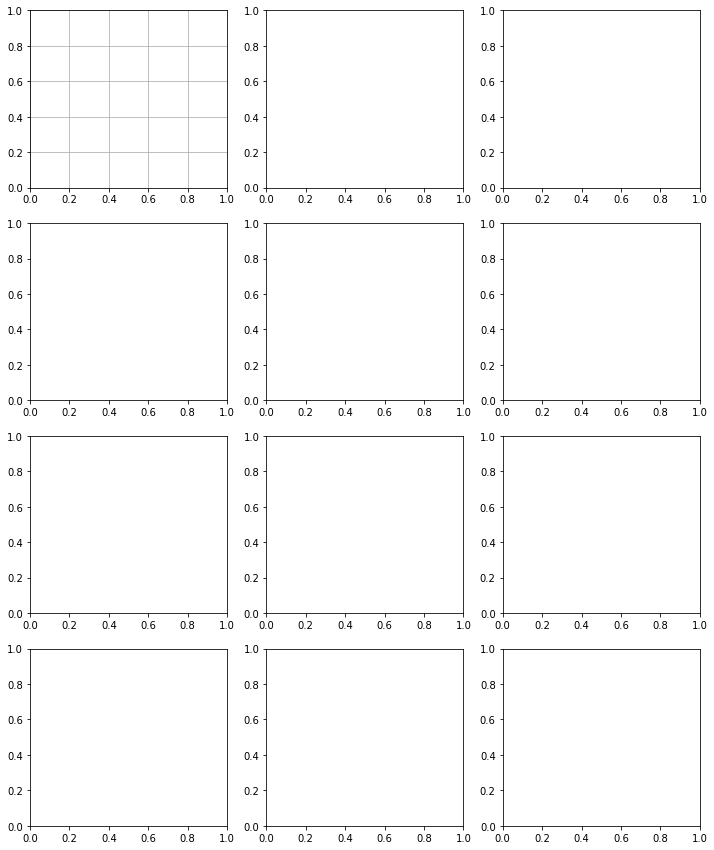

In [654]:
# plot together
k = 1
kidx = np.where(kvals==k)[0][0]

width = 12
fig, axes = plt.subplots(nrows=len(nuvals), ncols=len(mvals), figsize=(width,1.25*width))
for nuidx,nu in enumerate(nuvals):
    for midx, m in enumerate(mvals):
        ax = axes[nuidx,midx]
        ax.axhline(y=0, linewidth=1, color='r')
        ax.grid(1);    

        #for nuidx, nu in enumerate(nuvals):
#             print('{},{}'.format(midx,nuidx))
        desc = st.describe(dataST[:,:,midx,nuidx,kidx])
#             ax.errorbar(x=Nvals, y=desc.mean, yerr=np.sqrt(desc.variance)/np.sqrt(nreps), capsize=5, errorevery=5, label='$s\'={}$'.format(s1))
        ax.plot(Nvals, desc.mean, label=r'$\nu={}$'.format(nu))
        ax.set_title(r'$m={}, dof={}$'.format(m,nu))
        if nuidx == len(nuvals)-1: 
            ax.set_xlabel('$N$', fontsize=12)
        if midx == 0: 
            ax.set_ylabel(r'$T_{N,k}(m,s)$', fontsize=16)
        if nuidx==0 and midx==0: 
#             ax.legend(loc='center right')
            print('DING')
            ax.legend()
        ax.set_xlim([Nmin,Nmax])        
#         ax.set_ylim([-0.05,0.05]) # tweak        
fig.tight_layout()
plt.savefig('convergence-ST.png')
plt.show()    



## 5. Empirical distribution of test statistic

For hypothesis testing we need the distribution of $T_{N,k}(m,s)$. It turns out that it's approximately normal!

For testing $H_0:X\sim GG(m,s_0)$ against $H_1:X\sim GG(m,s_1)$ we have:
* The critical region
$
C = \{\mathbf{x}: T_{N,k}(\mathbf{x};m,s_0) \leq c\}
\text{ where }
\alpha = \mathbb{P}_{H_0}(T_{N,k}(m,s_0) \leq c\}
$
* The power function
$
\gamma(s_1;s_0) = \mathbb{P}_{H_1}(T_{N,k}(m,s_0)\leq c).
$



In [105]:
# Set parameter values

# dimension
mvals = np.array([1,2,3])

# neighbours
kvals = np.array([1,2,3])

# exponent
svals = np.array([0.5, 1, 1.5, 2, 2.5])

# sample size for points
Nmin = 25
Nmax = 1000
Ninc = 25
Nvals = np.arange(start=Nmin, stop=Nmax+1, step=Ninc)

In [ ]:
# sample size for T
nreps = 10
nrepsT = 1000

In [ ]:
# Generate data (might take a long time!!)

# init data structure
data7 = np.zeros(shape=(nreps, nrepsT, len(Nvals), len(mvals), len(svals), len(kvals)))

# main loop
for rep in range(nreps):

    for repT in range(nrepsT):
        print('\r{}:'.format(rep) + 'x'*(repT+1) + '-'*(nrepsT-repT-1), end='')

        # iterate over N-values
        for Nidx, N in enumerate(Nvals):

            # iterate over m-values
            for midx, m in enumerate(mvals):

                # iterate over s-values
                for sidx, s in enumerate(svals):
                
                    # create point sample
                    pts = create_points_GG(N, dim=m, expo=s)

                    # compute T
                    data7[rep,repT,Nidx,midx,sidx,:] = compute_statistics(pts, nnmax=max(kvals), expo=s)
            

In [ ]:
data7.shape

In [ ]:
np.save('datacube7.npy', data7)

In [ ]:
# compute Shapiro-Wilk p-values

sw_pvals = np.zeros(shape=(nreps, len(Nvals), len(mvals), len(svals), len(kvals)))

for rep in range(nreps):

    for Nidx, N in enumerate(Nvals):

        for midx, m in enumerate(mvals):

            for sidx, s in enumerate(svals):

                for kidx, k in enumerate(kvals):

                    Tsample = data7[rep,:,Nidx,midx,sidx,kidx]
                    sw_pvals[rep,Nidx,midx,sidx,kidx] = st.shapiro(Tsample).pvalue
            

In [ ]:
# histogram for single (N,k,m,s)
m = 2
midx = np.where(mvals==m)[0][0]
k = 1
kidx = np.where(kvals==k)[0][0]
s = 1.5
sidx = np.where(svals==s)[0][0]
N = 100
Nidx = np.where(Nvals==N)[0][0]

repno = 0
pv = sw_pvals[repno,Nidx,midx,sidx,kidx]
print('pv = {}'.format(pv))

xbar, ssd = st.norm.fit(values)
plt.hist(values, bins=20, density=True, edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, xbar, ssd)
plt.plot(x, p, 'k', linestyle='dashed', linewidth=2)
# plt.title('xbar = {:.2f}, ssd = {:.2f}'.format(xbar, ssd));
plt.title('N = {}, k = {}, m = {}, s = {}'.format(N,k,m,s));

## Consistency

In [660]:
nuvals = [25,34, 40,43,145,234,240, 245,250, 255]
[compute_test_statistic(points, dof = nu) for nu in nuvals]

[-2.236950334172601,
 -1.316888577449781,
 -1.4581911170618085,
 -1.46152919315713,
 -0.5425858311743745,
 0.1987242072100841,
 -0.26224898879881664,
 -0.19507543548897033,
 0.12197080276408201,
 -0.2539123485134418]

In [661]:
mmax = 4
mvals = 1 + np.arange(mmax)
mvals

array([1, 2, 3, 4])

ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

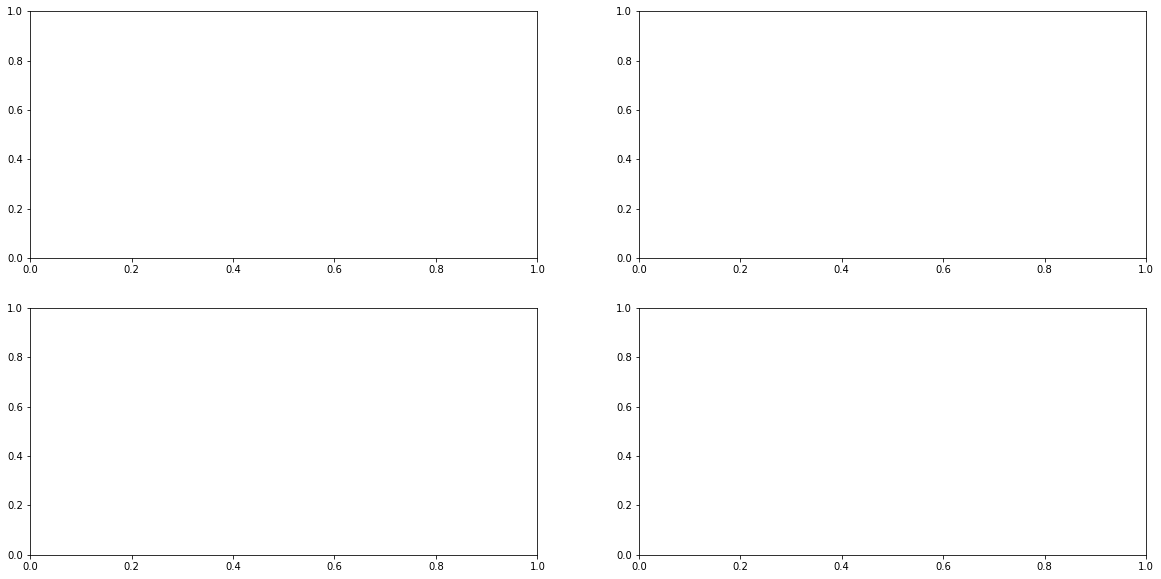

In [662]:
# consistency
# check to see whether the test statistic
# converges to zero under the null hypothesis
#    H0: the data is distributed as Student T dist

# we use k=1 from now on (no evidence that k > 1 is better)

# here we do it for q and different values of m,
# to see whether it converges as npts increases

# below we do it for m=2 and different values of s
mmax = 4
mvals = 1 + np.arange(mmax)
#kmax = 10
#kvals = 1 + np.arange(kmax)
k = 1
nuvals = [5,6,8,12,34, 40,43,145,234,345]

nmax = 10000
ninc = 100
nvals = np.arange(ninc, nmax+ninc, ninc)
#s = 2


#fig, axes = plt.subplots(nrows=len(mvals), ncols=1, figsize=(8,4*len(mvals)))
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
#for idx, ax in enumerate(axes):
for idx, ax in enumerate(axes.flat):
    nu = nuvals[idx]
    est = []
    for npts in nvals:
        for nu in nuvals:
            ptsT = create_points_T(npts, dim=m, dof=nu, std=True)
        #pts = create_points(npts,dist='T', dim=m) # Multivariate Gaussian points (s=2)
            est.append(compute_test_statistic(ptsT, dof = nu))
    ax.plot(nvals,est)
    ax.plot([1,nmax],[0,0])
    ax.set_title('nu = {}'.format(nu))
    ax.set_xlabel('$N$', fontsize=12)
    ax.set_ylabel('$\hat{T}_{N,k}(m)$', fontsize=16)
#     ax.set_xticks(nvals)
    ax.set_xlim([ninc,nmax])
    
fig.tight_layout()
plt.savefig('consistency.png')
plt.show()

## Estimate Critical Value

In [58]:
# function to estimate critical values
def estimate_critical_value(sample_values, p):
    sample_values.sort()
    idx = round(len(sample_values)*p)
    return sample_values[idx-1]

In [663]:
nuvals = [25,34, 40,43,145,234,240, 245,250, 255]
pvals = [0.01, 0.05, 0.1, 0.9, 0.95, 0.99]
npts = 1000
m = 1
ptsT = create_points_T(npts, dim=m, dof=nu, std=True)
quants = np.zeros((len(nuvals), len(pvals)))
for nuIdx, nu in enumerate(nuvals):
    print('nu = {:.2f}'.format(nu))
    sample = np.zeros(npts)
    for rep in np.arange(npts):
        est = compute_test_statistic(ptsT, dof = 25)
        sample[rep] = est
    for pIdx, p in enumerate(pvals):
        quants[nuIdx,pIdx] = estimate_critical_value(sample, p)




nu = 25.00
nu = 34.00
nu = 40.00
nu = 43.00
nu = 145.00
nu = 234.00
nu = 240.00
nu = 245.00
nu = 250.00
nu = 255.00


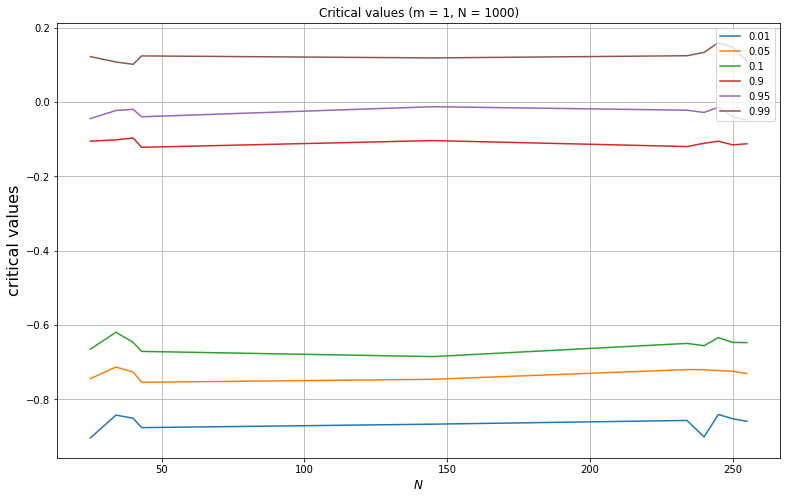

In [664]:
fig, ax = plt.subplots(1,1, figsize=(8*GR,8))
for pIdx, p in enumerate(pvals):
    ax.plot(nuvals, quants[:,pIdx], label='{}'.format(p))
ax.set_title('Critical values (m = {}, N = {})'.format(m, npts))
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel('critical values', fontsize=16)
ax.legend(loc='upper right')
ax.grid(True)
plt.savefig('cvals-vs-s.png')

In [682]:
# 1. create sample of test statistic values under H0 (s=1)
m = 2
dof = 250
npts = 1000
sample_values = np.zeros(npts)
for rep in np.arange(npts):
    ptsT = create_points_T(npts, dim=m, dof=nu, std=True)    
    sample_values[rep] = compute_test_statistic(ptsT, dof)

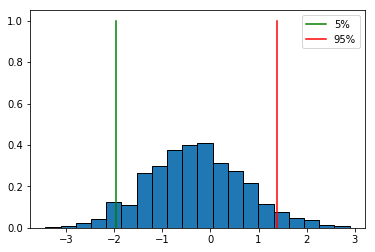

[-1.9591,1.3768]


In [683]:
# 2. plot histogram showing the critical values at 5% and 95%
nbins = 20
plt.hist(sample_values, nbins, density=True, edgecolor='black')
lower = estimate_critical_value(sample_values, 0.05)
upper = estimate_critical_value(sample_values, 0.95)
plt.plot([lower,lower], [0,1], 'g', label='5%')
plt.plot([upper,upper], [0,1], 'r', label='95%')
plt.legend()
plt.show()
print('[{:.4f},{:.4f}]'.format(lower,upper))

In [667]:
ptsT = create_points_T(npts, dim=m, dof=nu, std=True)
def create_batch_repetition(npts, num_reps, k=1, dim=2, dof=25):
    Results = np.zeros(num_reps)
    for rep_no in range(num_reps):
        pts=  create_points_T(npts, dim, dof=nu, std=True)
        Results[rep_no] = compute_test_statistic(pts, dof)
        #return Results
        return sum(Results)/num_reps

In [668]:
npts=1000
num_reps =100
Results = create_batch_repetition(npts, num_reps, k=1, dof= 25)
print(np.mean(Results))
print(np.std(Results))

-0.017722911670589064
0.0


In [ ]:
np.arange(1000,500000,1000).shape

In [ ]:
# test create_points
N=np.arange(1000,500000,1000)
Results=[]
for i in np.arange(0,499):
    pts1 = create_points_T(npts, dim=2, dof=25)
    Results.append((compute_test_statistic(pts1),dof))
    

In [ ]:
GR = (1+np.sqrt(5))/2
width = 7
fig, ax, = plt.subplots(figsize=(width*GR, width))
plt.plot(N,Results)
plt.xlabel('$N$')
plt.ylabel('$\hat{T}_{N,k}(m,s)$')
plt.axhline(y=0, color='r',linestyle='-')

# Empirical CDF of Test Statistic

In [684]:
# test create_points
N=npts=10000
dim = 2
m=2
pts2 = create_points_T(npts, dim, dof)
sample_T_values=[]
for i in np.arange(0,5000):
    sample_T_values.append(compute_test_statistic(pts2, dof))

In [685]:
"""Our goal in here is to present a noticeable picture supporting by simulation of consistency goodness 
of fit entropy based test for GG distribution using different parameters: k,s,m and N. """
# Empirical CDF of test statistic with fixed k,m and s with the aspect of generating
#100000 sample sizes and also each of sample size has been repeated 
#5000 times (experiment) 
"""According to the theory of test statistics must be negative because of maximum entropy principle. 
It is easily seen that the empirical distribution of test statistic is supported on negative part of the
real line """

'According to the theory of test statistics must be negative because of maximum entropy principle. \nIt is easily seen that the empirical distribution of test statistic is supported on negative part of the\nreal line '

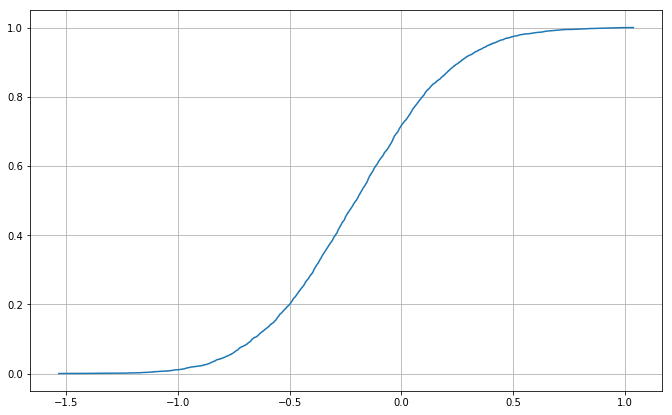

In [686]:
#fig, ax = plt.subplots(1,1, figsize=(8*GR,8))
GR = (1+np.sqrt(5))/2
width = 7
fig, ax, = plt.subplots(figsize=(width*GR, width))
ax.grid(True)
#ax.legend(loc='right')
x = np.sort(sample_T_values)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)

### Skewness and Kurtosis of test statistic

In [687]:
"""It can be seen that the skewness of test statistic is on left. It means that by skewed left, 
the left tail is long  relative to the right tail. In our plot, the skewness is -0.01285 for 10000 sample size. 
In this case, our skewness is between -0.5 and 0.5, it means that the distribution is approximately symmetric. 
One can easily verify that when skewness is away from the zero, then the test statistic  is not normally distributed. 
In addition, as number of sample size increase, the skewness of test statistic  approximates normality and the value of 
skewness becomes zero. Note that the p-value of test statistic is 0.50508..., which is larger than alpha (0.05). It means 
that it is fail to reject the Null hypothesis.
"""

'It can be seen that the skewness of test statistic is on left. It means that by skewed left, \nthe left tail is long  relative to the right tail. In our plot, the skewness is -0.01285 for 10000 sample size. \nIn this case, our skewness is between -0.5 and 0.5, it means that the distribution is approximately symmetric. \nOne can easily verify that when skewness is away from the zero, then the test statistic  is not normally distributed. \nIn addition, as number of sample size increase, the skewness of test statistic  approximates normality and the value of \nskewness becomes zero. Note that the p-value of test statistic is 0.50508..., which is larger than alpha (0.05). It means \nthat it is fail to reject the Null hypothesis.\n'

In [688]:
import scipy as sc
from scipy.stats import kurtosis
from scipy.stats import normaltest
print("Skewness of the test statistic:", sc.stats.skew(sample_T_values,axis=0,bias=True))
print("Kurtosis of the test statistic:", kurtosis(sample_T_values))

Skewness of the test statistic: 0.07364314972523375
Kurtosis of the test statistic: 0.028988043229507543


In [689]:
normaltest(sample_T_values,axis=0,nan_policy="propagate")

NormaltestResult(statistic=4.737079200824791, pvalue=0.0936173452270109)

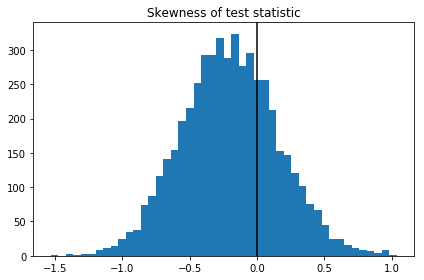

In [690]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
GR = (1+np.sqrt(5))/2
width = 7

#fig, ax1, = plt.subplots(figsize=(width*GR, width))

x = np.linspace( -5, 5, 5000 )
y = sample_T_values



f, (ax1) = plt.subplots(1)
ax1.hist(y, bins='auto')
ax1.set_title('Skewness of test statistic')
plt.axvline(x=0.0, color = 'k')

plt.tight_layout()

mean :  -0.201542013913538
var  :  0.12848035270130476
skew :  0.07364314972523375
kurt :  0.028988043229507543


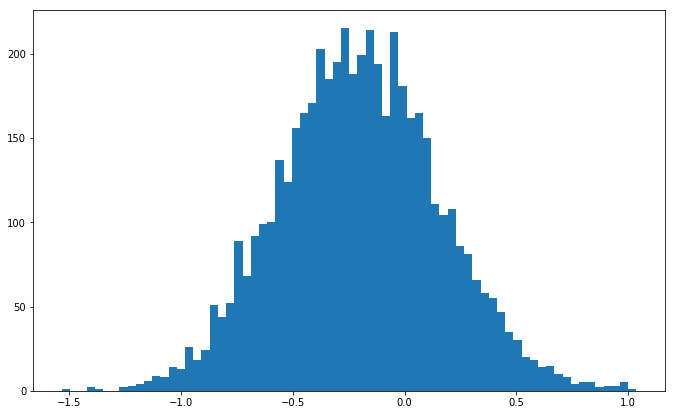

In [691]:
%matplotlib inline
from scipy.stats import kurtosis
from scipy.stats import skew

GR = (1+np.sqrt(5))/2
width = 7
fig, ax, = plt.subplots(figsize=(width*GR, width))

data =  sample_T_values
#np.var(data)

plt.hist(data, bins=70)

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

## Kurtosis

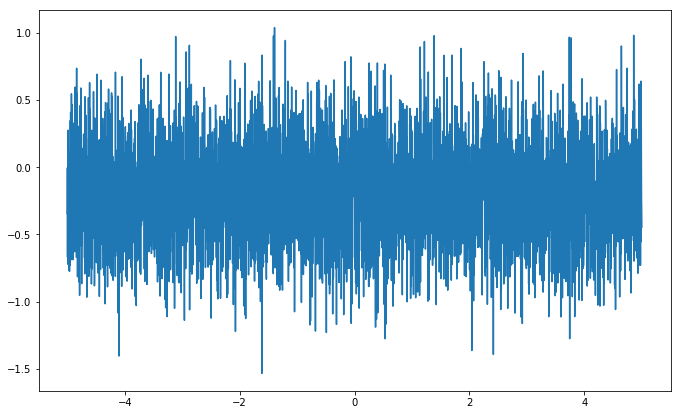

In [692]:
# Graph using numpy.linspace()  
# finding kurtosis 
"""Our aim is to show using kurtosis of test statistic  to see if result is close enough to normal."""
  
from scipy.stats import kurtosis   
%matplotlib inline
GR = (1+np.sqrt(5))/2
width = 7
fig, ax, = plt.subplots(figsize=(width*GR, width))
  
x1 = np.linspace( -5, 5, 5000 ) 
y1 = sample_T_values 
  
plt.plot(x1,y1)

In [693]:
p = 0.5050878641697394
alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a  GG  distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")



The null hypothesis cannot be rejected
